# MASTERCLASS 4: ML Project: Predicting the health status of an individual
### (Create an ML model in 1 hour)

## Librairies

In [3]:
# File and data handling

import os                          # Allows interaction with the operating system, for example to read files
import pandas as pd                # Used to manipulate data in the form of tables (DataFrame)
import numpy as np                 # Provides mathematical tools and multidimensional arrays

# Data visualization

import seaborn as sns              # for creating attractive statistical visualizations
import matplotlib.pyplot as plt    # to plot graphs in Python

# Machine Learning (Logistic Regression)

# LogisticRegression: Classification model that predicts a probability of belonging to a class
from sklearn.linear_model import LogisticRegression 

# Data preparation and cross-validation

# train_test_split: Splits the data into training and test sets
# cross_val_score: Evaluates the performance of a model with cross-validation
from sklearn.model_selection import train_test_split, cross_val_score

# Data preprocessing

# StandardScaler: Normalizes data to prevent one variable from dominating the others
# LabelEncoder: Converts categories to numeric values
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Model evaluation

# accuracy_score: Calculates the accuracy of a classification model
# classification_report: Displays metrics such as precision and recall
# ConfusionMatrixDisplay: Displays the confusion matrix
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# r2_score, mean_absolute_error, mean_squared_error: Evaluation metrics for regression models
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Import data

- **Installing the Library: kagglehub**

In [6]:
# kagglehub: A tool for easily downloading Kaggle's datasets
!pip install kagglehub

## Importing and downloading the dataset

In [8]:
import kagglehub

# Download the dataset to the computer
path = kagglehub.dataset_download("adeniranstephen/obesity-prediction-dataset")

# Display the location of the dataset
print("Path to dataset files:", path)

Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\adeniranstephen\obesity-prediction-dataset\versions\1


In [9]:
# List the downloaded file(s)
os.listdir(path)

['ObesityDataSet_raw_and_data_sinthetic.csv']

## Loading Data with Pandas

In [11]:
# pd.read_csv(...) : Loads data into a DataFrame (df)
df = pd.read_csv(path + '/ObesityDataSet_raw_and_data_sinthetic.csv')

In [12]:
# df.head(): returns the first 5 rows in df
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


**Features:**

*   **Gender** – Male or Female.
*   **Age –** The person’s age in years.
* **Height –** Height in meters.
* **Weight –** Weight in kilograms.
* **family_history_with_overweight –** Whether the person has a family history of * * being overweight (yes/no).
* **FAVC –** If the person frequently consumes high-calorie foods (yes/no).
* **FCVC –** Frequency of vegetable consumption (scale from 1 to 3).
* **NCP –** Number of main meals per day.
* **CAEC –** Frequency of consuming food between meals (Never, Sometimes, Frequently, Always).
* **SMOKE –** Whether the person smokes (yes/no).
* **CH2O –** Daily water intake (scale from 1 to 3).
* **SCC –** If the person monitors their calorie intake (yes/no).
* **FAF –** Physical activity frequency (scale from 0 to 3).
* **TUE –** Time spent using technology (scale from 0 to 3).
* **CALC –** Frequency of alcohol consumption (Never, Sometimes, Frequently, Always).
* **MTRANS –** Main mode of transportation (Automobile, Bike, Motorbike, Public Transportation, Walking).

**Target :**

* **NObeyesdad –** Obesity level (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III)

In [14]:
# A quick summary of the DataFrame df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [15]:
'''
using info() helps us know:

- the number of rows in the dataset : here we have 2111 rows (rows = entries)

- the number of columns in the dataset : here we have 17 columns

- the presence or absence of non-null values: here we have an absence of non-null values

- the columns & their types: here we have 
Gender (object), Age (int64), Height (float64), Weight (float64), family_history_with_overweight (object), FAVC (object),
FCVC (float64), NCP (float64), CAEC (object), SMOKE (object), CH2O (float64), SCC (object), FAF (float64), TUE (float64), 
CALC (object), MTRANS (object), NObeyesdad (object)

- the memory usage: 280.5+ KB

- the number of occurrences of a data type: here we have float64(7 times), int64(1 time), object(9 times)

'''

'\nusing info() helps us know:\n\n- the number of rows in the dataset : here we have 2111 rows (rows = entries)\n\n- the number of columns in the dataset : here we have 17 columns\n\n- the presence or absence of non-null values: here we have an absence of non-null values\n\n- the columns & their types: here we have \nGender (object), Age (int64), Height (float64), Weight (float64), family_history_with_overweight (object), FAVC (object),\nFCVC (float64), NCP (float64), CAEC (object), SMOKE (object), CH2O (float64), SCC (object), FAF (float64), TUE (float64), \nCALC (object), MTRANS (object), NObeyesdad (object)\n\n- the memory usage: 280.5+ KB\n\n- the number of occurrences of a data type: here we have float64(7 times), int64(1 time), object(9 times)\n\n'

In [16]:
# isna(): returns a boolean same-sized Dataframe indicating if the values are NAN in df or not
# True: means NAN , False: not a NAN
# sum(): returns the sum of the True values in the boolean Dataframe
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [17]:
'''
Actually df.isna().sum(), just like df.shape, doesn't really help here, since we already saw if the values are missing in each column using info()
'''

"\nActually df.isna().sum(), just like df.shape, doesn't really help here, since we already saw if the values are missing in each column using info()\n"

In [18]:
'''
- Question: so the first thing to do is to use info() & shape?

- Answer:

We can approach the problems using many different ways,
the first thing to do is to diagnose the state of our dataset, understand what's in it:
if there are missing values,
if there are duplicates (even if we have a very good ML model, duplicates can have an effect on the results:
when we do a split for the train set, the validation set and or the test set,
these duplicates will be found here and there, so the model will already have the answers for the questions asked,
it would be like a student cheating on an exam)

'''

"\n- Question: so the first thing to do is to use info() & shape?\n\n- Answer:\n\nWe can approach the problems using many different ways,\nthe first thing to do is to diagnose the state of our dataset, understand what's in it:\nif there are missing values,\nif there are duplicates (even if we have a very good ML model, duplicates can have an effect on the results:\nwhen we do a split for the train set, the validation set and or the test set,\nthese duplicates will be found here and there, so the model will already have the answers for the questions asked,\nit would be like a student cheating on an exam)\n\n"

In [19]:
# df.duplicated(): returns a boolean same-sized Dataframe indicating if the rows are duplicated in df
# True: means duplicate , False: means not a duplicate
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2106    False
2107    False
2108    False
2109    False
2110    False
Length: 2111, dtype: bool

In [20]:
# df.duplicated(): returns a boolean same-sized Dataframe indicating if the rows are duplicated in df
# True: means duplicate , False: means not a duplicate
# sum(): returns the sum of the True values in the boolean Dataframe
df.duplicated().sum()

24

In [21]:
'''
We have 24 duplicates in df
We can see the duplicates using df[df.duplicated()]:

'''

'\nWe have 24 duplicates in df\nWe can see the duplicates using df[df.duplicated()]:\n\n'

In [22]:
# df.duplicated(): returns a boolean same-sized Dataframe indicating if the rows are duplicated in df
# df[df.duplicated()]: uses boolean indexing to locate the (24) duplicates in df
#df[...]: Filters the DataFrame, keeping only rows that are duplicates (True in df.duplicated())
df[df.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [23]:
'''
Are these really duplicates? Or errors in the dataset? That's a good question to ask!
And we don't have the answer to this question yet!
If we want an answer to this question we have to do an analysis, or ask the people who collected the data on the data collection protocol,... etc
THERE CAN BE SIMILAR CASES ON THE SAME DATASET: we can have identical profiles (a lookalike), there are billions of us on earth!

Here we choose to delete the duplicates (we can keep them if we want to, it depends on the situation)

'''

"\nAre these really duplicates? Or errors in the dataset? That's a good question to ask!\nAnd we don't have the answer to this question yet!\nIf we want an answer to this question we have to do an analysis, or ask the people who collected the data on the data collection protocol,... etc\nTHERE CAN BE SIMILAR CASES ON THE SAME DATASET: we can have identical profiles (a lookalike), there are billions of us on earth!\n\nHere we choose to delete the duplicates (we can keep them if we want to, it depends on the situation)\n\n"

In [24]:
# df[~df.duplicated()]: is used to remove duplicates from a DataFrame df

# df.duplicated(): returns a boolean same-sized Dataframe indicating if the rows are duplicated in df
# True: means duplicate , False: means not a duplicate
# ~: This is the negation operator in Python. It reverses True to False and vice versa
#df[...]: Filters the DataFrame, keeping only rows that are not duplicates (False in df.duplicated())

df[~df.duplicated()]

# If we want to remove duplicates by directly modifying the DataFrame, we can use: df.drop_duplicates(inplace=True)
# Where df.drop_duplicates() drops the duplicates in df & inplace=True modifies df by deleting these duplicates
# If we want to remove duplicates considering only certain columns, we can do: df.drop_duplicates(subset=['ColumnName'], inplace=True):
# This will remove duplicates only based on the "ColumnName" column, keeping the first occurrence

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


In [25]:
'''
We now have 2087 rows & 17 columns in df
'''

'\nWe now have 2087 rows & 17 columns in df\n'

# EDA

In [27]:
# df's columns
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [28]:
# df.select_dtypes(): returns a subset of the DataFrame's columns based on the column dtypes
# df.select_dtypes(include="object"): Selects only columns whose data type is "object" (text or categories) in df
df.select_dtypes(include="object")

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [29]:
# df.select_dtypes(): returns a subset of the DataFrame's columns based on the column dtypes
# df.select_dtypes(include="object"): Selects only columns whose data type is "object" (text or categories) in df
# .columns: Extracts the names of these columns as a list of Pandas indexes.
df.select_dtypes(include="object").columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [30]:
'''
Why is this useful?
- It allows us to identify categorical columns (variables) that need to be converted to numbers for use by a machine learning model.
- We can then use LabelEncoder or OneHotEncoder to transform these variables into numerical variables that can be used by an algorithm.
'''

'\nWhy is this useful?\n- It allows us to identify categorical columns (variables) that need to be converted to numbers for use by a machine learning model.\n- We can then use LabelEncoder or OneHotEncoder to transform these variables into numerical variables that can be used by an algorithm.\n'

In [31]:
# df.select_dtypes(exclude="object"): selects only columns whose data type is NOT "object" (numeric columns)
# .columns: extracts the names of these columns as a list of Pandas indexes
df.select_dtypes(exclude="object").columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [32]:
'''
Why is this useful?

- This allows us to isolate columns containing numbers (such as age, weight, height, etc.).
- These columns can be used directly by machine learning algorithms without additional transformation.
- It also helps distinguish categorical data from numerical data before preprocessing.

'''

'\nWhy is this useful?\n\n- This allows us to isolate columns containing numbers (such as age, weight, height, etc.).\n- These columns can be used directly by machine learning algorithms without additional transformation.\n- It also helps distinguish categorical data from numerical data before preprocessing.\n\n'

### The Target Variable

We can use 2 methods:
- **unique():**

In [35]:
# df["NObeyesdad"]: Selects only the target column NObeyesdad
# .unique(): Displays all the unique values present in this column + the data type of the column NObeyesdad
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [36]:
'''
This allows us to:

- Identify the different classes your model will need to predict (Obese, Overweight, Normal Weight...).
- Check for errors or inconsistencies in the labels.
- Determine if it's a classification problem (because the target is categorical).

'''

"\nThis allows us to:\n\n- Identify the different classes your model will need to predict (Obese, Overweight, Normal Weight...).\n- Check for errors or inconsistencies in the labels.\n- Determine if it's a classification problem (because the target is categorical).\n\n"

- **value_counts():**

In [38]:
# The number of occurrences of each category in the NObeyesdad column

# df["NObeyesdad"]: Selects only the target column NObeyesdad
# value_counts(): Count how many times each unique value appears in this column:
# The index represents each unique value in this column ("Obese," "Overweight," "Normal Weight," etc.)
# The values represent the number of examples in each category (unique value)
df["NObeyesdad"].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [39]:
'''
Why is this important?

- Check for class imbalance (imbalanced dataset problem).
- An imbalance can distort the model's predictions, potentially favoring the majority class.

'''

"\nWhy is this important?\n\n- Check for class imbalance (imbalanced dataset problem).\n- An imbalance can distort the model's predictions, potentially favoring the majority class.\n\n"

### The variables

#### Categorical variables: Gender & family_history_with_overweight

In [41]:
df["Gender"].value_counts()

Gender
Male      1068
Female    1043
Name: count, dtype: int64

In [42]:
'''
The column Gender is fairly distributed (50% each)
'''

'\nThe column Gender is fairly distributed (50% each)\n'

In [43]:
df["family_history_with_overweight"].value_counts()

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

In [44]:
'''
There are many people with family history (1726, compared to 385 without)
Overweight is not Obesity !!! Obesity is a disease
'''

'\nThere are many people with family history (1726, compared to 385 without)\nOverweight is not Obesity !!! Obesity is a disease\n'

### pivot table(s)

In [46]:
# df["NObeyesdad"]: selects the target column (class to predict)
# df["family_history_with_overweight"]: selects an explanatory variable (presence or absence of a family history of overweight)

# pd.crosstab(…): Creates a pivot table where:
# The rows correspond to the categories of "NObeyesdad" (Insufficient_Weight,Normal_Weight,...)
# The columns correspond to the values of "family_history_with_overweight" (yes, no)
# The numerical values indicate the number of occurrences of each combination
pd.crosstab(df["NObeyesdad"], df["family_history_with_overweight"])

family_history_with_overweight,no,yes
NObeyesdad,,
Insufficient_Weight,146,126
Normal_Weight,132,155
Obesity_Type_I,7,344
Obesity_Type_II,1,296
Obesity_Type_III,0,324
Overweight_Level_I,81,209
Overweight_Level_II,18,272


In [47]:
'''
So based on these observations, can we draw a general conclusion from this?
(That's the question a good DS must ask & have an answer to)

- What we're seeing here is: are the results applicable to the population? What can I apply from these observations on the population?
- The chi-square test can't answer this question, it answers another type of question
The chi-square test does the opposite: I form the hypothesis and then I take observations. Does that validate or invalidate my hypothesis?

>>> That's not the same! & we need to understand that

This table:
- Allows us to analyze the influence of family history of overweight on obesity.
- Checks whether there is a strong correlation between these two variables.
- Helps us better understand the data distribution before training the model.

'''

"\nSo based on these observations, can we draw a general conclusion from this?\n(That's the question a good DS must ask & have an answer to)\n\n- What we're seeing here is: are the results applicable to the population? What can I apply from these observations on the population?\n- The chi-square test can't answer this question, it answers another type of question\nThe chi-square test does the opposite: I form the hypothesis and then I take observations. Does that validate or invalidate my hypothesis?\n\n>>> That's not the same! & we need to understand that\n\nThis table:\n- Allows us to analyze the influence of family history of overweight on obesity.\n- Checks whether there is a strong correlation between these two variables.\n- Helps us better understand the data distribution before training the model.\n\n"

**Key Observations:**

**1. Insufficient Weight and normal-weight individuals are more balanced**

- **Insufficient Weight:** 146 without a history (no), 126 with (yes) : Almost balanced distribution.
- **Normal Weight:** 132 without (no), 155 with (yes) : Also balanced distribution.

👉 Unlike obesity, **these categories are not strongly dependent on family history**.

**2. Obesity is strongly associated with a family history of overweight**

Almost all obese individuals have a family history of overweight:
- **Obesity Type I :** 344 with a history (yes) versus only 7 without (no).
- **Obesity Type II :** 296 with (yes), versus 1 without (no).
- **Obesity Type III :** 324 with (yes), versus 0 without (no).

👉 This suggests a **strong correlation between obesity and family history**.

**3. Overweight is also influenced by family history**

- **Overweight Level I:** 209 people with a history (yes), 81 without (no).
- **Overweight Level II:** 272 with a history (yes), 18 without (no).

👉 The higher the level of overweight, the greater the number of individuals with a family history of being overweight.

🎯 **Conclusion:**

**Family history of overweight is a key factor in obesity:**

- Very strong correlation for obesity levels (Obesity Types I, II, and III).
- Moderate correlation for overweight (Overweight Levels I and II).
- Little influence for normal and underweight individuals.

#### Numerical variables:

In [50]:
# df.select_dtypes(exclude="object"): selects only columns whose data type is NOT "object" (numeric columns)
# .columns: extracts the names of these columns as a list of Pandas indexes
df.select_dtypes(exclude="object").columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

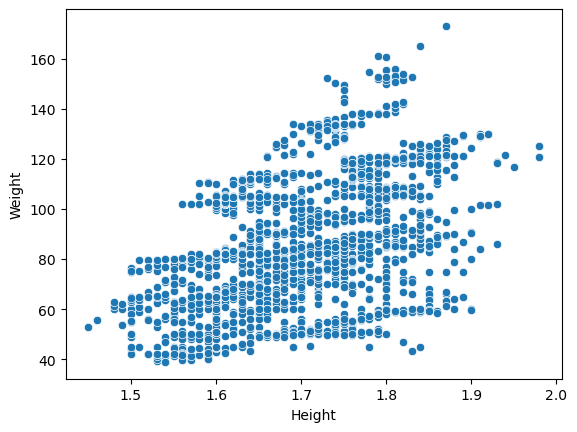

In [51]:
# Create a Scatter Plot

# sns.scatterplot(df,...): creates a Scatter Plot using df as data
# x="Height" : the x-axis represents height
# y="Weight" : the y-axis represents weight
sns.scatterplot(df, x="Height", y="Weight")

#plt.show(): displays the graph
plt.show()

In [52]:
'''
We see that there is a correlation between Height & Weight: the bigger the height, the bigger the weight (obviously!)
'''

'\nWe see that there is a correlation between Height & Weight: the bigger the height, the bigger the weight (obviously!)\n'

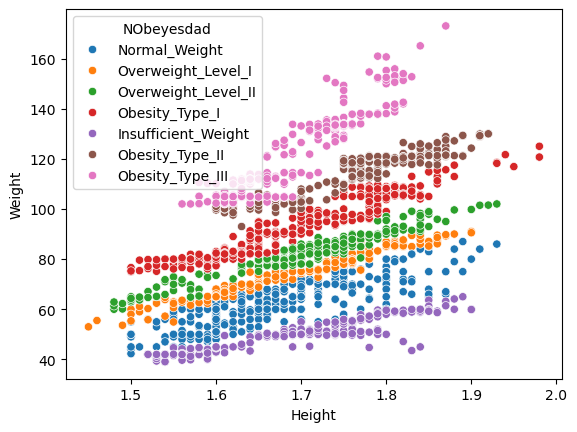

In [53]:
# Create a Scatter Plot

# x="Height" : the x-axis represents height
# y="Weight" : the y-axis represents weight
# hue="NObeyesdad" : the points are colored according to obesity category
sns.scatterplot(df, x="Height", y="Weight", hue="NObeyesdad")

#plt.show(): displays the graph
plt.show()

In [54]:
'''
The graph answers these questions:

1)- Do the categories overlap?
If the colors are mixed, it means the separation is unclear, which could make classification more difficult.

Here we see that:
- Obese people have a higher weight for the same height.
- The "Underweight" and "Normal Weight" categories are lower in the graph.

'''

'\nThe graph answers these questions:\n\n1)- Do the categories overlap?\nIf the colors are mixed, it means the separation is unclear, which could make classification more difficult.\n\nHere we see that:\n- Obese people have a higher weight for the same height.\n- The "Underweight" and "Normal Weight" categories are lower in the graph.\n\n'

In [55]:
'''
A very good data cleaning, preprocessing, data selection & data transformation can give us a dataset so obvious that
it can lead to conclusions about the relationships between the variables, and the importance of variables in prediction without even using an ML model,
it becomes so obvious that we may say to ourselves that we no longer need an ML model to predict!
But we still need ML to know the function necessary for the model to do predictions.

'''

'\nA very good data cleaning, preprocessing, data selection & data transformation can give us a dataset so obvious that\nit can lead to conclusions about the relationships between the variables, and the importance of variables in prediction without even using an ML model,\nit becomes so obvious that we may say to ourselves that we no longer need an ML model to predict!\nBut we still need ML to know the function necessary for the model to do predictions.\n\n'

In [56]:
'''
Here in this project we assume that the dataset is cleaned and we investigated the variables,...etc
'''

'\nHere in this project we assume that the dataset is cleaned and we investigated the variables,...etc\n'

# Machine Learning

In [58]:
'''
Normally, it would be better to split the dataset into a train set and a test set, but here, for practical reasons,
we prefer to first encode everything then make a train test and a test set with normalization, standardization, etc.

'''

'\nNormally, it would be better to split the dataset into a train set and a test set, but here, for practical reasons,\nwe prefer to first encode everything then make a train test and a test set with normalization, standardization, etc.\n\n'

In [59]:
# df.select_dtypes(): returns a subset of df's columns based on the column dtypes
# df.select_dtypes(include="object"): selects only columns whose data type is "object" (text or categories) in df
# head(): displays the first 5 lines of the result.
df.select_dtypes(include="object").head()

# This allows us to isolate qualitative variables, which are not directly usable for a Machine Learning model

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II


In [60]:
'''
Why is this useful?
- To identify the categorical variables in the dataset.
- To have a preview of the values to understand how they are represented ("Yes"/"No", "Public_Transportation"/"Walking").
- To anticipate the encoding (to transform these values into numbers).

'''

'\nWhy is this useful?\n- To identify the categorical variables in the dataset.\n- To have a preview of the values to understand how they are represented ("Yes"/"No", "Public_Transportation"/"Walking").\n- To anticipate the encoding (to transform these values into numbers).\n\n'

In [61]:
# CAEC: Frequency of consuming food between meals (Never, Sometimes, Frequently, Always)

# df["CAEC"]: selects the CAEC column from df
# value_counts(): counts how many times each unique value appears in this column
df["CAEC"].value_counts()

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

In [62]:
'''
Why is this important?
- Check the distribution of values to see if one category is dominant.
- Identify whether this variable can influence obesity (more snacking = greater risk?).
- Prepare the encoding of categorical variables (LabelEncoder or OneHotEncoder).


Here we have:
the values Sometimes, Frequently,... show us that there is a logical order in this variable (CAEC)
So, it is not relevant to use OrdinalEncoder or OneHotEncoder
This will increase the number of columns in the data set, and this will cause overfitting problems, etc.
That must absolutely be avoided. It is much better to exploit the fact of having an order in all our data.
So for that, what we are going to do is use a mapping function (encoding)

'''

'\nWhy is this important?\n- Check the distribution of values to see if one category is dominant.\n- Identify whether this variable can influence obesity (more snacking = greater risk?).\n- Prepare the encoding of categorical variables (LabelEncoder or OneHotEncoder).\n\n\nHere we have:\nthe values Sometimes, Frequently,... show us that there is a logical order in this variable (CAEC)\nSo, it is not relevant to use OrdinalEncoder or OneHotEncoder\nThis will increase the number of columns in the data set, and this will cause overfitting problems, etc.\nThat must absolutely be avoided. It is much better to exploit the fact of having an order in all our data.\nSo for that, what we are going to do is use a mapping function (encoding)\n\n'

**This code converts the text categories in the CAEC column into numeric values ​​so that they can be used by a Machine Learning model:**

In [64]:
# Create the encoding dictionary

# Associate each text category with a number:
# The higher the value, the greater the frequency of food consumption between meals
encoding = {"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3}

# df["CAEC"].map(encoding): replaces each value in df["CAEC"] with its numeric equivalent
df["CAEC"] = df["CAEC"].map(encoding)

In [65]:
'''
Encoding:
Here we have: the higher the value, the greater the frequency of food consumption between meals

Encoding in one direction or another may very well have an effect on the ML model (it's totally possible!):
For example, in another project we can encode in a certain direction & obtain a weak model,
but obtain a higher performing model if we did the encoding in the opposite direction

'''

"\nEncoding:\nHere we have: the higher the value, the greater the frequency of food consumption between meals\n\nEncoding in one direction or another may very well have an effect on the ML model (it's totally possible!):\nFor example, in another project we can encode in a certain direction & obtain a weak model,\nbut obtain a higher performing model if we did the encoding in the opposite direction\n\n"

In [66]:
# Verify the results

# df["CAEC"]: selects the CAEC column from df
# value_counts(): counts how many times each unique value appears in this column
# "no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3
df["CAEC"].value_counts()

CAEC
1    1765
2     242
3      53
0      51
Name: count, dtype: int64

In [67]:
# df["CALC"]: selects the CALC column from df
# value_counts(): counts how many times each unique value appears in this column
df["CALC"].value_counts()

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [68]:
#encoding of the colmn CALC
# CALC: Frequency of alcohol consumption (Never, Sometimes, Frequently, Always)

# df["CALC"]: selects the CALC column from df
# value_counts(): counts how many times each unique value appears in this column
# map(encoding): replaces each CAEC value with its numeric equivalent
df["CALC"] = df["CALC"].map(encoding)

In [69]:
# Verify the results

# df["CALC"]: selects the CAEC column from df
# value_counts(): counts how many times each unique value appears in this column
# "no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3
df["CALC"].value_counts()

CALC
1    1401
0     639
2      70
3       1
Name: count, dtype: int64

In [70]:
'''
Why use map() for yes/no variables instead of OneHotEncoder or LabelEncoder?
When a categorical variable has only two values (yes/no, true/false, male/female, etc.), we often prefer to use map() instead of OneHotEncoder or LabelEncoder
Here's why:

- It's simple and clear: We directly replace "no" with 0 and "yes" with 1.
- It's fast: No need to import LabelEncoder or OneHotEncoder.
- Models understand binary values ••(0/1) and can use them directly.

Why avoid OneHotEncoder for yes/no?
OneHotEncoder creates a new column for each unique value, which is unnecessary for a binary variable!

Explanation:
- It creates two columns (is_no, is_yes), when only one is enough (0/1).
- It increases the size of the dataset for no reason.
- For a binary variable, a single column already encodes all the information

Conclusion:
- For yes/no: use map()
- For categories with multiple classes: use LabelEncoder
- For categories with no logical order: use OneHotEncoder

'''

'\nWhy use map() for yes/no variables instead of OneHotEncoder or LabelEncoder?\nWhen a categorical variable has only two values (yes/no, true/false, male/female, etc.), we often prefer to use map() instead of OneHotEncoder or LabelEncoder\nHere\'s why:\n\n- It\'s simple and clear: We directly replace "no" with 0 and "yes" with 1.\n- It\'s fast: No need to import LabelEncoder or OneHotEncoder.\n- Models understand binary values ••(0/1) and can use them directly.\n\nWhy avoid OneHotEncoder for yes/no?\nOneHotEncoder creates a new column for each unique value, which is unnecessary for a binary variable!\n\nExplanation:\n- It creates two columns (is_no, is_yes), when only one is enough (0/1).\n- It increases the size of the dataset for no reason.\n- For a binary variable, a single column already encodes all the information\n\nConclusion:\n- For yes/no: use map()\n- For categories with multiple classes: use LabelEncoder\n- For categories with no logical order: use OneHotEncoder\n\n'

In [71]:
# MTRANS: Main mode of transportation (Automobile, Bike, Motorbike, Public Transportation, Walking)

# df["MTRANS"]: selects the MTRANS column from df
# value_counts(): counts how many times each unique value appears in this column
df["MTRANS"].value_counts()

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [72]:
'''
We can encode this variable based on speed, or activity (highlighting the physical effort), or even motorized/non-motorized,...etc
and just by doing that, we can come up with interesting conclusions/hypotheses, This kind of thinking is important for success,
but then we always have to test our hypotheses.
'''

'\nWe can encode this variable based on speed, or activity (highlighting the physical effort), or even motorized/non-motorized,...etc\nand just by doing that, we can come up with interesting conclusions/hypotheses, This kind of thinking is important for success,\nbut then we always have to test our hypotheses.\n'

In [73]:
# X: Matrix of features

# FCVC: Frequency of Consumption of Vegetables
# NCP: Number of main meals per day
# CAEC: Consumption of food between meals (already encoded in 0-3)
# CH2O: Consommation quotidienne d’eau
# FAF: Physical Activity Frequency
# TUE: Time using technology devices
# CALC: Consumption of alcohol (already encoded in 0-3)
X = df[['Age', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC']]

# y: Target variable
y = df['NObeyesdad']

In [74]:
'''
Why select these variables?
- They are known risk factors influencing weight and obesity.
- They are numeric or already encoded, therefore can be directly used by an ML model.
- Reducing the number of variables can improve model performance and prevent overfitting.

'''

'\nWhy select these variables?\n- They are known risk factors influencing weight and obesity.\n- They are numeric or already encoded, therefore can be directly used by an ML model.\n- Reducing the number of variables can improve model performance and prevent overfitting.\n\n'

In [75]:
# 5 first rows of X
X.head()

,Age,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC
0,21,2.0,3.0,1,2.0,0.0,1.0,0
1,21,3.0,3.0,1,3.0,3.0,0.0,1
2,23,2.0,3.0,1,2.0,2.0,1.0,2
3,27,3.0,3.0,1,2.0,2.0,0.0,2
4,22,2.0,1.0,1,2.0,0.0,0.0,1


In [76]:
# Creating an encoder

#LabelEncoder(): creates an encoder that will transform categorical values into numerical values
encoder = LabelEncoder()

# Transforming the categories in df["NObeyesdad"] into numbers

# fit(): learns the different categories present in the column
# transform(): converts each value to a single number
# new_y: is a numeric array that the model can use
new_y = encoder.fit_transform(df["NObeyesdad"])

In [77]:
'''
Why LabelEncoder and not OneHotEncoder?

- LabelEncoder is suitable for multi-class classification (more than two categories).
- Simpler and more compact: new_y remains a 1D vector instead of a matrix.
- Some models (SVM, Neural Networks) prefer this format to OneHotEncoding.

'''

'\nWhy LabelEncoder and not OneHotEncoder?\n\n- LabelEncoder is suitable for multi-class classification (more than two categories).\n- Simpler and more compact: new_y remains a 1D vector instead of a matrix.\n- Some models (SVM, Neural Networks) prefer this format to OneHotEncoding.\n\n'

In [78]:
# Dividing the data into two sets:
# train_test_split(): splits arrays or matrices into random train and test subsets
# X_train and y_train: Used to train the model
# X_test and y_test: Used to evaluate the model's performance on unknown data
# test_size=0.25: 25% of the data will be used for testing and 75% for training
X_train, X_test, y_train, y_test = train_test_split(X, new_y, test_size=0.25)

In [79]:
# X: Matrix of features
X.shape

(2111, 8)

In [80]:
# X_train: Matrix of features used to to train the model
X_train.shape

(1583, 8)

In [81]:
# X_test: Matrix of features used to evaluate the model's performance based on unknown data
X_test.shape

(528, 8)

In [82]:
# y: Target variable
y.shape

(2111,)

In [83]:
# y_train: the amount of data (from y) used to to train the model
y_train.shape

(1583,)

In [84]:
# y_test: the amount of data (from y) used to evaluate the model's performance based on unknown data
y_test.shape

(528,)

In [85]:
#X: Matrix of features
X.head()

,Age,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC
0,21,2.0,3.0,1,2.0,0.0,1.0,0
1,21,3.0,3.0,1,3.0,3.0,0.0,1
2,23,2.0,3.0,1,2.0,2.0,1.0,2
3,27,3.0,3.0,1,2.0,2.0,0.0,2
4,22,2.0,1.0,1,2.0,0.0,0.0,1


### Normalization with StandardScaler

Applying feature scaling (normalization) to the training data to improve model performance

In [87]:
# Create the standardizer (scaler)
# StandardScaler(): Creates a scaler object that will standardize the data.
# This standardization transforms each variable so that it has: a mean of 0 & a standard deviation of 1
scaler = StandardScaler()

# Learning + data transformation
# fit(X_train): learns the mean and standard deviation of each column from X_train
# transform(X_train): applies this transformation to X_train
# X_train_scaled: contains the same data, but scaled
X_train_scaled = scaler.fit_transform(X_train)

In [88]:
'''
Why normalize after the train_test_split() and not before?
That's a good question, and it's a very important point in machine learning!

Problem if we normalize before splitting
If we apply StandardScaler() before splitting the data into train and test, then:
- The StandardScaler will use the entire dataset to calculate the mean and standard deviation.
- When we split the data into train and test, the test data will have been influenced by the training data.
- In real life, when making predictions, we can't know the complete distribution of the data in advance.
>>> This introduces a "data leakage", which distorts the evaluation of the model, because it's going to be a little bit better than it's supposed to be.

Why normalize after the train_test_split()?
- We train the model only on data it would have seen in a real-world scenario.
- We calculate the mean and standard deviation on X_train only, so that the test data remain independent.
- When we apply scaler.transform(X_test), we use the same parameters learned on X_train, without bias.

Conclusion:
- Always normalize after separating the data into train and test data
- Avoid introducing test information into the training data
- Ensure a realistic model evaluation

'''

'\nWhy normalize after the train_test_split() and not before?\nThat\'s a good question, and it\'s a very important point in machine learning!\n\nProblem if we normalize before splitting\nIf we apply StandardScaler() before splitting the data into train and test, then:\n- The StandardScaler will use the entire dataset to calculate the mean and standard deviation.\n- When we split the data into train and test, the test data will have been influenced by the training data.\n- In real life, when making predictions, we can\'t know the complete distribution of the data in advance.\n>>> This introduces a "data leakage", which distorts the evaluation of the model, because it\'s going to be a little bit better than it\'s supposed to be.\n\nWhy normalize after the train_test_split()?\n- We train the model only on data it would have seen in a real-world scenario.\n- We calculate the mean and standard deviation on X_train only, so that the test data remain independent.\n- When we apply scaler.trans

In [89]:
# Verify the results
X_train_scaled

array([[-0.36317701, -2.64283572, -2.16186384, ..., -1.18347868,
         2.20591514,  0.53238278],
       [-0.83817772, -0.76597834,  0.40468068, ...,  0.00331372,
        -1.08581582,  0.53238278],
       [-0.20484343,  1.11087904, -2.16186384, ...,  1.56987969,
        -1.08581582,  0.53238278],
       ...,
       [ 0.27015728,  1.11087904,  0.40468068, ..., -1.18347868,
        -0.91793754,  0.53238278],
       [-0.83817772, -0.76597834,  0.40468068, ...,  0.00331372,
        -1.08581582, -1.43668719],
       [-0.83817772, -0.76597834,  1.68795294, ...,  1.19010612,
         0.56004966,  0.53238278]])

In [90]:
'''
Why standardize data?
- Prevents one variable from dominating the others exp: age ranges from 10 to 80 years, while FCVC (vegetable frequency) is between 0 and 3
- Improves algorithm convergence: Some models (such as logistic regression, SVM, KNN) are scale-sensitive
- Useful for distance-based methods: KNN, PCA, Neural Networks, etc

'''

'\nWhy standardize data?\n- Prevents one variable from dominating the others exp: age ranges from 10 to 80 years, while FCVC (vegetable frequency) is between 0 and 3\n- Improves algorithm convergence: Some models (such as logistic regression, SVM, KNN) are scale-sensitive\n- Useful for distance-based methods: KNN, PCA, Neural Networks, etc\n\n'

- Let's verify the efficiency of scaling the Features in the train set with min(axis=0) & max(axis=0)

In [92]:
# show the minimal value in X_train_scaled according to axis=0 (in each column)
X_train_scaled.min(axis=0)

array([-1.62984558, -2.64283572, -2.16186384, -2.48439601, -1.67522915,
       -1.18347868, -1.08581582, -1.43668719])

In [93]:
# show the maximal value in X_train_scaled according to axis=0 (in each column)
X_train_scaled.max(axis=0)

array([5.8118323 , 1.11087904, 1.68795294, 4.10688704, 1.61920504,
       2.37689852, 2.20591514, 4.47052273])

In [94]:
'''
We see that the values of the features in the train set go from -2,68 to 4.40 which is good!
It will help us developp our ML model
'''

'\nWe see that the values of the features in the train set go from -2,68 to 4.40 which is good!\nIt will help us developp our ML model\n'

In [95]:
# Model Creation

# LogisticRegression(): creates a classification model based on logistic regression
# It will learn to predict y_train based on x_train_scaled
# fit(): trains the model on the training data (X_train_scaled, y_train)
# It adjusts the coefficients (weights) to find the best decision boundary between classes
model = LogisticRegression().fit(X_train_scaled, y_train)

In [96]:
'''
Why logistic regression?
- It's a simple and effective model for classification problems.
- It works well on standardized data, hence the importance of the StandardScaler.
- It provides probabilities, which allows us to analyze the confidence of each prediction.

'''

"\nWhy logistic regression?\n- It's a simple and effective model for classification problems.\n- It works well on standardized data, hence the importance of the StandardScaler.\n- It provides probabilities, which allows us to analyze the confidence of each prediction.\n\n"

In [97]:
# Predictions

# We apply the same transformation as for X_train, this time on X_test
# Caution: We use transform() and not fit_transform(), because we must apply the same parameters (mean and standard deviation learned on X_train)
X_test_scaled = scaler.transform(X_test)

# predict(): uses the trained model to predict the classes of X_test_scaled
# predictions: contains an array of predicted classes (the values of y_test estimated by the model)
predictions = model.predict(X_test_scaled)

In [98]:
# Accuracy (accuracy_score)

# y_true=y_test: the true classes
# y_pred=predictions: the classes predicted by the model
# accuracy_score(): calculates the percentage of correct predictions
# This code measures the accuracy of the model by comparing the actual values (y_test) to the predicted values (predictions)
accuracy_score(y_true=y_test, y_pred=predictions)

0.45075757575757575

In [181]:
'''
So this model can predict the answer 45% of the time
This model is less efficient than the model developed using the variables 'Weight', 'FCVC', 'Height', 'CAEC' & 'CALC'
(Height & Weight make the job easier)
'''

"\nSo this model can predict the answer 45% of the time\nThis model is less efficient than the model developed using the variables 'Weight', 'FCVC', 'Height', 'CAEC' & 'CALC'\n(Height & Weight make the job easier)\n"